In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr

In [2]:
gare11 = ['GARE11.SA']
fundos = ['GARE11.SA', 'TRXF11.SA', 'KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA', 'ZAVI11.SA', 'HGRU11.SA',
          'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA', 'BTLG11.SA', 'XPLG11.SA', 'LVBI11.SA', 'BRCO11.SA', 'VILG11.SA', 'HSLG11.SA',
          'GGRC11.SA', 'TRBL11.SA', 'XPIN11.SA', 'RBRL11.SA', 'BTAL11.SA', 'PATL11.SA', 'BLMG11.SA', 'XPML11.SA',
          'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'GZIT11.SA', 'MALL11.SA', 'BPML11.SA', 'PVBI11.SA', 'BRCR11.SA', 'JSRE11.SA',
          'HGRE11.SA', 'BROF11.SA', 'GTWR11.SA', 'KORE11.SA', 'VINO11.SA', 'RCRB11.SA', 'HGPO11.SA', 'TEPP11.SA', 'AIEC11.SA',
          'FATN11.SA', 'RECT11.SA', 'RZAT11.SA', 'AJFI11.SA', 'CPSH11.SA']
peers_diretos = ['KNRI11.SA', 'TVRI11.SA', 'ALZR11.SA', 'RBRP11.SA', 'SARE11.SA',
                 'HGRU11.SA', 'TRXF11.SA', 'RBVA11.SA', 'VIUR11.SA', 'HGLG11.SA',
                 'BTLG11.SA', 'XPLG11.SA', 'BRCO11.SA', 'LVBI11.SA', 'VILG11.SA', 'GARE11.SA']
tijolo = ['HIB Tijolo', 'XXXX', 'Renda Urbana', 'Logistico', 'Shopping', 'Lajes', 'Outros Imóveis']

def excluir_5_dig(COTA):
    return str(COTA)[:6]

def peers(x):
    if x in peers_diretos:
        return 'PEER'
    else:
        return 'NAO PEER'
    
def tijolo_papel(x):
    if x == 'Recebivel':
        return "Papel"
    elif x == "XXXX":
        return "Tijolo"
    else:
        return "Tijolo"

data_inicial = '2024-12-02'
data_final = '2024-12-31'

tab_cotacoes = yf.download(fundos, data_inicial, data_final)['Close']
tab_cotacoes= tab_cotacoes.round(2)
tab_cotacoes.index = pd.to_datetime(tab_cotacoes.index)

tab_gare11 = yf.download(gare11, data_inicial, data_final)['Close']
tab_gare11 = tab_gare11.round(2)
tab_gare11.index = pd.to_datetime(tab_gare11.index)

var_mensal = (tab_cotacoes.loc['2024-12-06'] - tab_cotacoes.loc['2024-12-02'])/tab_cotacoes.loc['2024-12-02']
var_gare11 = (tab_gare11.loc['2024-12-06'] - tab_gare11.loc['2024-12-02'])/tab_gare11.loc['2024-12-02']

tab_mensal = pd.DataFrame(var_mensal)
tab_mensal = tab_mensal.rename(columns={0:'VARIAÇÃO'})

df_gare11 = pd.DataFrame(var_gare11)
df_gare11 = df_gare11.rename(columns = {0:'VARIAÇÃO'})

media_tijolo = (tab_mensal['VARIAÇÃO'].mean())
definitivo_gare11 = (df_gare11['VARIAÇÃO'].mean())

consolidado = {'VAR_TIJOLO':[media_tijolo], 'VAR_GARE11':[definitivo_gare11]}
df_tijoloxgare11 = pd.DataFrame(consolidado)
df_tijoloxgare11

[*********************100%***********************]  49 of 49 completed
[*********************100%***********************]  1 of 1 completed


,VAR_TIJOLO,VAR_GARE11
0,-0.031749,-0.001157


In [3]:
base_ativos = pd.read_excel('Base_ativos.xlsx')
pd.options.display.float_format
base_ativos = base_ativos.drop(columns = ['SUP', 'COTISTAS', 'COTAS', 'DIV Y1', 'DIV Y12', 'COTA 2024', 'COTA 2023'])
#base_ativos['VP MM'] = base_ativos['VP MM'].apply(lambda x: "{:,.0f}".format(x))
#base_ativos['LIQUIDEZ - MÉDIA'] = base_ativos['LIQUIDEZ - MÉDIA'].apply(lambda x: "{:,.0f}".format(x))
#base_ativos['LIQUIDEZ - SOMA'] = base_ativos['LIQUIDEZ - SOMA'].apply(lambda x: "{:,.0f}".format(x))
base_ativos['MACRO'] = base_ativos['TIPO'].apply(tijolo_papel)

base_tijolo = base_ativos.query('MACRO == "Tijolo"')

base_ativos

,TICKER,TIPO,VP MM,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,MACRO
0,KNRI11.SA,HIB Tijolo,4.553042e+09,7.592850e+06,1.442641e+08,Tijolo
1,TVRI11.SA,HIB Tijolo,1.614022e+09,1.540689e+06,2.927309e+07,Tijolo
2,ALZR11.SA,HIB Tijolo,1.279322e+09,2.312998e+06,4.394697e+07,Tijolo
3,GARE11.SA,XXXX,1.350740e+09,6.658875e+06,1.265186e+08,Tijolo
4,RBRP11.SA,HIB Tijolo,9.339984e+08,1.658621e+06,3.151379e+07,Tijolo
...,...,...,...,...,...,...
112,SPXS11.SA,Recebivel,1.884556e+08,4.815625e+05,9.149687e+06,Papel
113,ARRI11.SA,Recebivel,1.726284e+08,5.812750e+05,1.104422e+07,Papel
114,CYCR11.SA,Recebivel,3.428976e+08,7.738895e+05,1.470390e+07,Papel
115,CLIN11.SA,Recebivel,4.192289e+08,1.412549e+06,2.683842e+07,Papel


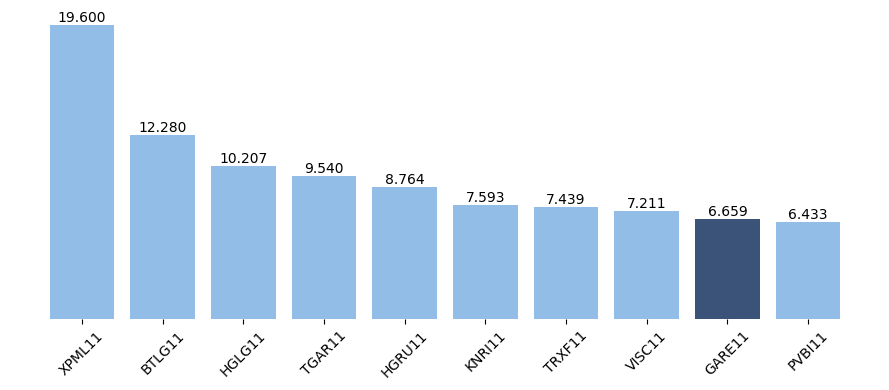

In [29]:
tic = 'TICKER'
liq = 'LIQUIDEZ - MÉDIA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ = base_tijolo[[tic, liq, pl]]
TOP10_LIQUIDEZ = TOP10_LIQUIDEZ.sort_values(by=['LIQUIDEZ - MÉDIA'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ['TICKER'] = TOP10_LIQUIDEZ['TICKER'].apply(excluir_5_dig)
TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA'] = TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA']/1000 

# Dados fornecidos
data = TOP10_LIQUIDEZ

# Criar o DataFrame
df = pd.DataFrame(data)

# Definir as cores para destacar o GARE11.SA
cores = ['#91BDE7' if fundo != 'GARE11' else '#3B5279' for fundo in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQUIDEZ - MÉDIA'], color=cores)

# Adicionar rótulos de barra com separadores de milhares (usando ponto)
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:,.0f}'.replace(',', '.'),  # Formatar com separador de milhares como ponto
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_title('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_LIQUIDEZ_MÉDIA.png', transparent = True, dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_24348\42389928.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']


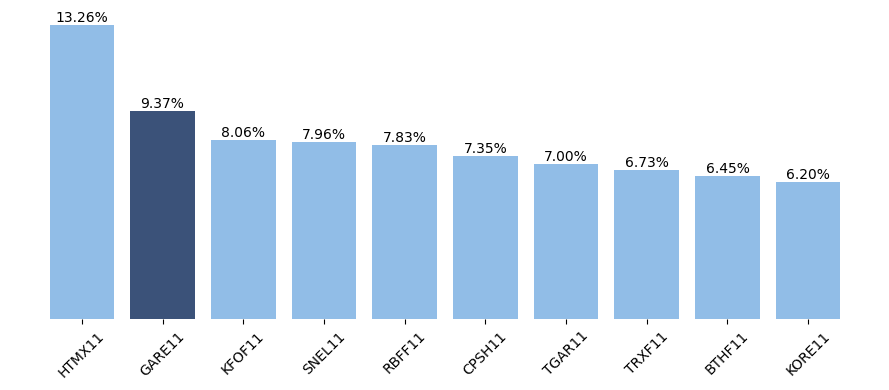

In [28]:
tic = 'TICKER'
liq = 'LIQUIDEZ - SOMA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ_SOMA = base_tijolo[[tic, liq, pl]]
TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']
TOP10_LIQUIDEZ_SOMA = TOP10_LIQUIDEZ_SOMA.sort_values(by=['LIQ/VP'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ_SOMA['TICKER'] = TOP10_LIQUIDEZ_SOMA['TICKER'].apply(excluir_5_dig)

data = TOP10_LIQUIDEZ_SOMA


# Criar o DataFrame
df = pd.DataFrame(data)

cores = ['#3B5279' if ticker == 'GARE11' else '#91BDE7' for ticker in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQ/VP'], color=cores)

# Adicionar rótulos de barra como porcentagem
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:.2%}',  # Formatar como porcentagem
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_LIQSOMAxPL.png', transparent=True, dpi=300, bbox_inches = 'tight')

# Exibir o gráfico
plt.show()

